In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
from google.colab import files
files.upload()
od.download('https://www.kaggle.com/datasets/julian3833/jigsaw-toxic-comment-classification-challenge')

Saving kaggle.json to kaggle.json


100%|██████████| 53.4M/53.4M [00:01<00:00, 52.1MB/s]


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/jigsaw-toxic-comment-classification-challenge/train.csv')

In [ ]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
def check_toxicity(df):
  label = 0
  for col in ['toxic']:
    if df[col] == 1:
      label = 1
      break

  return label

df['label'] = df.apply(check_toxicity, axis=1, result_type='expand')

In [ ]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


In [ ]:
import random

def drop_zero_labels(df, n=50000):
  df_filtered = df.copy()
  indices_to_drop = random.sample(list(df[df['label'] == 0].index), n)
  df_filtered.drop(indices_to_drop, inplace=True)

  return df_filtered

df_filtered = drop_zero_labels(df, n=50000)


In [ ]:
df_filtered

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,0


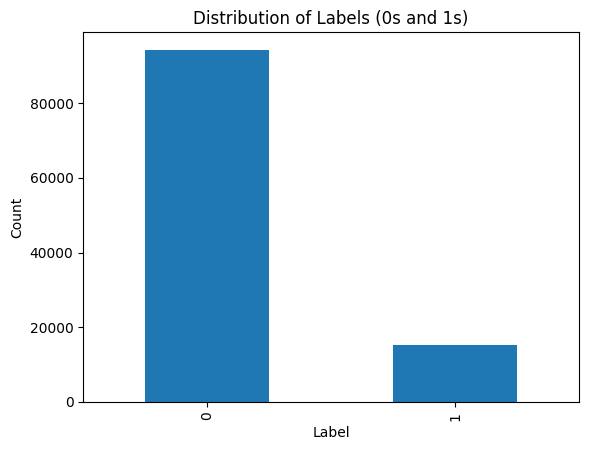

In [ ]:
import matplotlib.pyplot as plt


label_distribution = df_filtered['label'].value_counts()

label_distribution.plot(kind='bar')

plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels (0s and 1s)')

plt.show()


In [ ]:
df['label'].sum()

15294

In [ ]:
df_filtered['label'].sum()

15294

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')

In [ ]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def prepro(text):
    tokens = word_tokenize(text)
    stopwords = [word.lower() for word in tokens if word not in stop_words]
    filtered_tokens = [word.lower() for word in stopwords if word not in string.punctuation]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df_filtered['comment_text'] = df_filtered['comment_text'].apply(prepro)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000,use_idf=True,norm='l2')

In [ ]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df_filtered['comment_text'].values)

In [ ]:
print(tfidf_matrix)

  (0, 53)	0.23975638993259196
  (0, 66)	0.2754738447376746
  (0, 114)	0.28688456687887304
  (0, 1853)	0.1961356881325276
  (0, 2453)	0.15789475037772865
  (0, 1935)	0.10217224384701606
  (0, 2633)	0.10824379631389479
  (0, 2653)	0.1945444733164083
  (0, 2249)	0.17647108796590588
  (0, 2010)	0.11617617302469031
  (0, 242)	0.14607467343991634
  (0, 1049)	0.28931336074503794
  (0, 2990)	0.25092164588252547
  (0, 1811)	0.15603977669941427
  (0, 1200)	0.29390448839119143
  (0, 2837)	0.17701950605846728
  (0, 2679)	0.18813852553646515
  (0, 2302)	0.1918942257007848
  (0, 1072)	0.23334368113387566
  (0, 2823)	0.2281240105864339
  (0, 1647)	0.1546270686044394
  (0, 935)	0.15816384274652795
  (0, 2931)	0.1774106072464019
  (0, 1035)	0.2170503899828558
  (1, 2828)	0.21254514497974816
  :	:
  (109569, 157)	0.30661999752973884
  (109569, 2851)	0.350445575702044
  (109569, 1629)	0.5368300757829536
  (109569, 1595)	0.20778012553466269
  (109569, 2527)	0.3644316697492934
  (109569, 806)	0.29374515589

In [ ]:
pip install tensorflow

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
tfidf_df

,00,000,01,02,03,04,05,06,07,08,...,york,you,youbollocks,young,your,yourself,yourselfgo,youtube,ytmnd,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.250922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.205299,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.111709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.234448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y = df_filtered['label']

In [ ]:
from keras.utils import to_categorical

Y_encoded = to_categorical(Y, num_classes=2)
Y_encoded.shape

(109571, 2)

In [ ]:
Y_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
Y = Y.fillna(0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(tfidf_df, Y_encoded, test_size=0.2, random_state=49, stratify=Y_encoded)
del tfidf_df,df

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(0.01)))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)

history = model.fit(
    X_train.values,
    Y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test.values, Y_test),
    callbacks=[model_checkpoint, early_stopping, reduce_lr]
)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               384128    
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_5 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 64)               

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

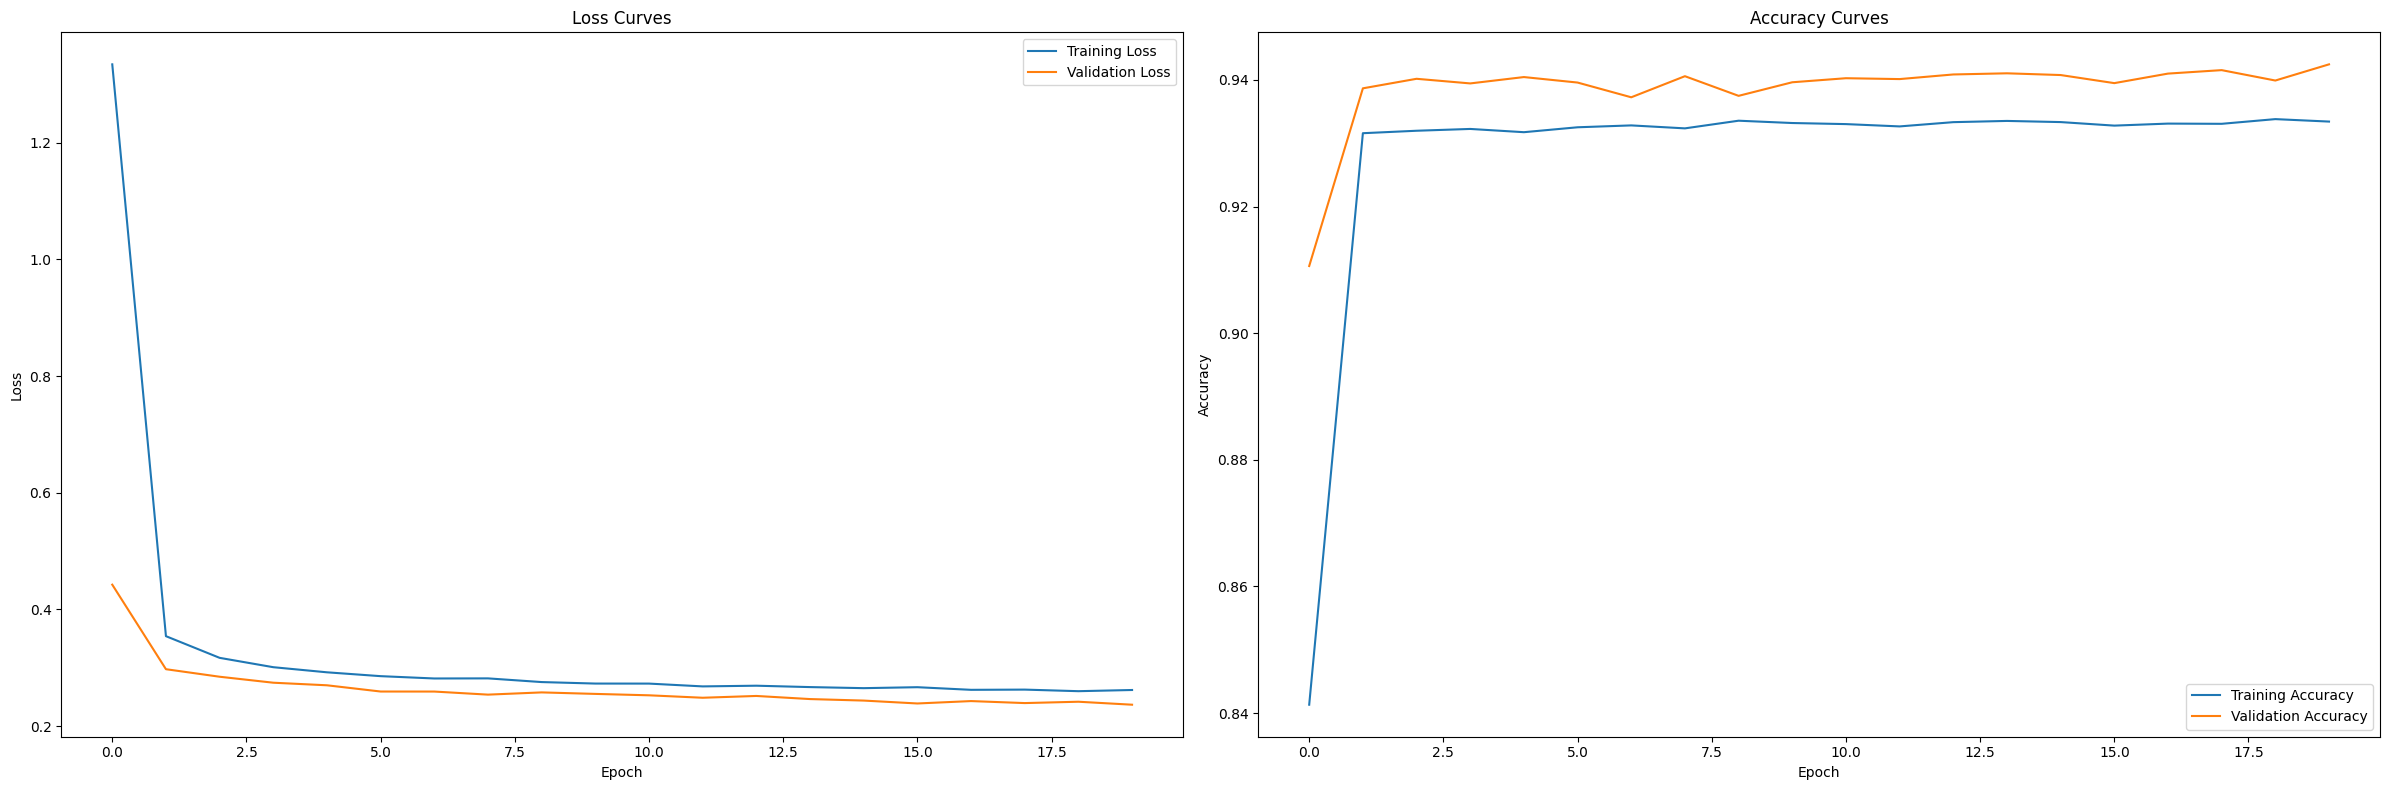

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, r2_score


plt.figure(figsize=(24, 8))
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()





plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test.values)

y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(Y_test, y_pred_binary)
print(f'Accuracy on test data: {accuracy * 100:.2f}%')

class_accuracy = []
for i in range(Y_test.shape[1]):
    class_accuracy.append(accuracy_score(Y_test[:, i], y_pred_binary[:, i]))
    print(f'Class {i} Accuracy: {class_accuracy[i] * 100:.2f}%')

print(classification_report(Y_test, y_pred_binary))


confusion = confusion_matrix(Y_test.argmax(axis=1), y_pred_binary.argmax(axis=1))
print("Confusion Matrix:")
print(confusion)


685/685 [==============================] - 2s 2ms/step
Accuracy on test data: 94.25%
Class 0 Accuracy: 94.25%
Class 1 Accuracy: 94.25%
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     18856
           1       0.86      0.70      0.77      3059

   micro avg       0.94      0.94      0.94     21915
   macro avg       0.91      0.84      0.87     21915
weighted avg       0.94      0.94      0.94     21915
 samples avg       0.94      0.94      0.94     21915

Confusion Matrix:
[[18511   345]
 [  916  2143]]


In [ ]:
userdata = input("Enter Sentence - ")
cleaneduserdata = prepro(userdata)
cleaneduserdata_list = [cleaneduserdata]
tfidf_matrix_user = tfidf_vectorizer.transform(cleaneduserdata_list)
tfidf_matrix_user = pd.DataFrame(tfidf_matrix_user.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

predictions = model.predict(tfidf_matrix_user.to_numpy())

if predictions[0][1] > predictions[0][0]:
    predicted_class = 1
else:
    predicted_class = 0
print(predictions)
print("Predicted Class:", predicted_class)


Enter Sentence - i hate u kill urself
1/1 [==============================] - 0s 80ms/step
[[0.05317556 0.94682443]]
Predicted Class: 1


In [ ]:
userdata = input("Enter Sentence - ")
cleaneduserdata = prepro(userdata)
cleaneduserdata_list = [cleaneduserdata]
tfidf_matrix_user = tfidf_vectorizer.transform(cleaneduserdata_list)
tfidf_matrix_user = pd.DataFrame(tfidf_matrix_user.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

predictions = model.predict(tfidf_matrix_user.to_numpy())

if predictions[0][1] > 0.7:
    predicted_class = 1
else:
    predicted_class = 0
print(predictions)
print("Predicted Class:", predicted_class)


Enter Sentence - i love u so much it hurts
1/1 [==============================] - 0s 18ms/step
[[0.95090187 0.04909811]]
Predicted Class: 0


In [ ]:
userdata = input("Enter Sentence - ")
cleaneduserdata = prepro(userdata)
cleaneduserdata_list = [cleaneduserdata]
tfidf_matrix_user = tfidf_vectorizer.transform(cleaneduserdata_list)
tfidf_matrix_user = pd.DataFrame(tfidf_matrix_user.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

predictions = model.predict(tfidf_matrix_user.to_numpy())

if predictions[0][1] >predictions[0][0] :
    predicted_class = 1
else:
    predicted_class = 0
print(predictions)
print("Predicted Class:", predicted_class)


Enter Sentence - jump off a cliff and die.
1/1 [==============================] - 0s 29ms/step
[[0.30803508 0.69196486]]
Predicted Class: 1
